In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("data/MPVDatasetDownload.xlsx", sheet_name="2013-2019 Killings by State")

In [3]:
df.columns

Index(['State', 'State Abbreviation', 'Total Population', 'Black Population',
       'Hispanic Population', 'Native American Population', 'Asian Population',
       'Pacific Islander Population', 'White Population', 'Other Population',
       '% African-American', '% Victims Black', 'Disparity',
       '# Black people killed', '# Hispanic people killed',
       '# Native American people killed', '# Asian people killed',
       '# Pacific Islanders killed', '# White people killed',
       '# Unknown Race people killed', '# People Killed',
       'Rate (Black People)', 'Rate (Hispanic People)',
       'Rate (Native American People)', 'Rate (Asian People)',
       'Rate (Pacific Islanders)', 'Rate (White People)', 'Rate (All People)',
       'Disparity in Rate', 'Black-White Disparity',
       'Hispanic-White Disparity', 'Native American-White Disparity'],
      dtype='object')

In [4]:
df.head()

,State,State Abbreviation,Total Population,Black Population,Hispanic Population,Native American Population,Asian Population,Pacific Islander Population,White Population,Other Population,...,Rate (Hispanic People),Rate (Native American People),Rate (Asian People),Rate (Pacific Islanders),Rate (White People),Rate (All People),Disparity in Rate,Black-White Disparity,Hispanic-White Disparity,Native American-White Disparity
0,Alabama,AL,4864680.0,1285737.0,203146.0,23243.0,63936.0,1521.0,3196730.0,90367.0,...,0.000000,0.000000,2.234377,0.000000,3.306951,4.052535,1.453111,1.780730,0.000000,0.000000
1,Alaska,AK,738516.0,22817.0,51186.0,103506.0,45617.0,8544.0,450754.0,56092.0,...,2.790942,16.562187,0.000000,0.000000,5.704727,7.737525,3.236692,4.390041,0.489233,2.903239
2,Arizona,AZ,6946685.0,286614.0,2163312.0,271946.0,222477.0,12523.0,3825886.0,163927.0,...,7.594176,7.354401,0.000000,0.000000,5.302227,7.012595,2.203370,2.914124,1.432262,1.387040
3,Arkansas,AR,2990671.0,458536.0,219052.0,17342.0,43441.0,7877.0,2173849.0,70574.0,...,1.956483,0.000000,3.288533,0.000000,3.942973,4.967829,1.944122,2.449438,0.496195,0.000000
4,California,CA,39148760.0,2164519.0,15221577.0,138427.0,5525439.0,138911.0,14695836.0,1264051.0,...,4.570580,7.224024,1.137595,9.255669,3.275952,4.302271,2.868695,3.767425,1.395191,2.205168


In [5]:
df["% Hispanic"] = df["Hispanic Population"] / df["Total Population"] 
df["% White"] = df["White Population"] / df["Total Population"] 

In [6]:
df_perce = df[["State Abbreviation", "% African-American", "% Hispanic", "% White"]]

In [7]:
df_perce = df_perce.rename(columns={"State Abbreviation" : "State", "% African-American": "Black", "% Hispanic": "Hispanic", "% White": "White"})

In [8]:
df[['% African-American', '% Victims Black', 'Disparity']].head()

,% African-American,% Victims Black,Disparity
0,0.264300,0.384058,0.119758
1,0.030896,0.100000,0.069104
2,0.041259,0.090909,0.049650
3,0.153322,0.298077,0.144755
4,0.055290,0.158609,0.103319


In [9]:
df_perce.head()

,State,Black,Hispanic,White
0,AL,0.264300,0.041759,0.657131
1,AK,0.030896,0.069309,0.610351
2,AZ,0.041259,0.311416,0.550750
3,AR,0.153322,0.073245,0.726877
4,CA,0.055290,0.388814,0.375384


In [10]:
df_perce["black_disparity"] = df["Disparity"].iloc[:]

In [11]:
df_perce["total_victims"] = df["# People Killed"]

In [12]:
df_perce["white_victims"] = df["# White people killed"]
df_perce["hispanic_victims"] = df["# Hispanic people killed"]

In [13]:
df_perce = df_perce.iloc[:51]

In [14]:
df_perce.fillna(0, inplace=True)

In [15]:
df_perce["white_victims"] = df_perce["white_victims"] / df_perce["total_victims"]
df_perce["hispanic_victims"] = df_perce["hispanic_victims"] / df_perce["total_victims"]

In [16]:
df_perce["white_disparity"] = df_perce["white_victims"] - df_perce["White"]
df_perce["hispanic_disparity"] = df_perce["hispanic_victims"] - df_perce["Hispanic"]

In [17]:
disparities = df_perce.drop(["total_victims", "white_victims", "hispanic_victims"], axis = 1).iloc[:]

In [18]:
disparities.head()

,State,Black,Hispanic,White,black_disparity,white_disparity,hispanic_disparity
0,AL,0.264300,0.041759,0.657131,0.119758,-0.120899,-0.041759
1,AK,0.030896,0.069309,0.610351,0.069104,-0.160351,-0.044309
2,AZ,0.041259,0.311416,0.550750,0.049650,-0.134328,0.025827
3,AR,0.153322,0.073245,0.726877,0.144755,-0.149954,-0.044399
4,CA,0.055290,0.388814,0.375384,0.103319,-0.089549,0.024248


In [19]:
stops = pd.read_csv("./data/opp-stops_state.csv")

In [20]:
32012.963855

32012.963855

In [21]:
stops.head()

,state,city,geography,subgeography,subject_race,search_rate,stop_rate,hit_rate,inferred_threshold,stops_per_year,stop_rate_n
0,AZ,Statewide,AZ,Apache County,white,NaN,0.077444,NaN,NaN,7064.888889,293234.024096
1,AZ,Statewide,AZ,Apache County,black,NaN,0.115928,NaN,NaN,385.246753,32012.963855
2,AZ,Statewide,AZ,Apache County,hispanic,NaN,0.065497,NaN,NaN,1280.962025,137774.746988
3,AZ,Statewide,AZ,Cochise County,white,NaN,0.077444,NaN,NaN,12371.855422,293234.024096
4,AZ,Statewide,AZ,Cochise County,black,NaN,0.115928,NaN,NaN,1568.810127,32012.963855


In [22]:
set(stops["state"])

{'AZ',
 'CA',
 'CO',
 'CT',
 'FL',
 'GA',
 'IL',
 'MA',
 'MT',
 'NC',
 'ND',
 'NH',
 'NY',
 'OH',
 'RI',
 'SC',
 'TN',
 'TX',
 'VT',
 'WA',
 'WI'}

In [23]:
for state in set(stops["state"]):
    for race in set(["black", "white", "hispanic"]):
        print(state, race, stops.groupby(["state", "subject_race"]).get_group((state, race))["stops_per_year"].sum(), "out of", stops.groupby(["state"]).get_group((state))["stops_per_year"].sum())

SC hispanic 30520.521188403913 out of 769453.9177768901
SC white 475677.6204690832 out of 769453.9177768901
SC black 263255.776119403 out of 769453.9177768901
TX hispanic 744609.285018736 out of 2031017.911857074
TX white 1070864.1493669953 out of 2031017.911857074
TX black 215544.47747134257 out of 2031017.911857074
CA hispanic 1470953.0909090913 out of 3753145.4489510492
CA white 1917549.4545454546 out of 3753145.4489510492
CA black 364642.9034965035 out of 3753145.4489510492
MA hispanic 38434.763636363634 out of 354744.6616407982
MA white 276078.99999999994 out of 354744.6616407982
MA black 40230.89800443459 out of 354744.6616407982
CO hispanic 46628.293234463956 out of 319296.7417380515
CO white 261594.88905855358 out of 319296.7417380515
CO black 11073.55944503399 out of 319296.7417380515
NC hispanic 54948.78514104346 out of 776737.9747177542
NC white 522815.0139698507 out of 776737.9747177542
NC black 198974.17560686008 out of 776737.9747177542
WI hispanic 7585.825196923286 out o

In [24]:
stops_perce = {}
for state in set(stops["state"]):
    for race in set(["black", "white", "hispanic"]):
        stops_perce[(state, race)] =  stops.groupby(["state", "subject_race"]).get_group((state, race))["stops_per_year"].sum() / stops.groupby(["state"]).get_group((state))["stops_per_year"].sum()

In [25]:
stops_perce

{('SC', 'hispanic'): 0.039665170952126606,
 ('SC', 'white'): 0.6182015705936142,
 ('SC', 'black'): 0.3421332584542592,
 ('TX', 'hispanic'): 0.36661876819092054,
 ('TX', 'white'): 0.527254901650692,
 ('TX', 'black'): 0.10612633015838749,
 ('CA', 'hispanic'): 0.39192541587222574,
 ('CA', 'white'): 0.5109179701738931,
 ('CA', 'black'): 0.09715661395388127,
 ('MA', 'hispanic'): 0.10834486827396238,
 ('MA', 'white'): 0.7782470882663984,
 ('MA', 'black'): 0.11340804345963904,
 ('CO', 'hispanic'): 0.14603435343764776,
 ('CO', 'white'): 0.8192845552842,
 ('CO', 'black'): 0.03468109127815231,
 ('NC', 'hispanic'): 0.07074301364113217,
 ('NC', 'white'): 0.673090580076026,
 ('NC', 'black'): 0.256166406282842,
 ('WI', 'hispanic'): 0.04081923107372714,
 ('WI', 'white'): 0.8951172964066637,
 ('WI', 'black'): 0.06406347251960928,
 ('NY', 'hispanic'): 0.08115611619632333,
 ('NY', 'white'): 0.7915304044220393,
 ('NY', 'black'): 0.12731347938163742,
 ('RI', 'hispanic'): 0.14387677569745275,
 ('RI', 'whit

In [26]:
disparities_stops = disparities.drop(["black_disparity", "white_disparity", "hispanic_disparity"], axis = 1)

In [27]:
black_disp = {}
white_disp = {}
hispanic_disp = {}

for state in set(stops["state"]):
    black_disp[state] = stops_perce[(state, "black")]
    white_disp[state] = stops_perce[(state, "white")]
    hispanic_disp[state] = stops_perce[(state, "hispanic")]

In [28]:
black_stops = pd.DataFrame(black_disp.items(), columns=["State", "black_stop_perce"])
white_stops = pd.DataFrame(white_disp.items(), columns=["State", "white_stop_perce"])
hispanic_stops = pd.DataFrame(hispanic_disp.items(), columns=["State", "hispanic_stop_perce"])

In [29]:
disparities_stops = disparities_stops.merge(black_stops, on = "State").merge(white_stops, on = "State").merge(hispanic_stops, on = "State")

In [30]:
disparities_stops.head()

,State,Black,Hispanic,White,black_stop_perce,white_stop_perce,hispanic_stop_perce
0,AZ,0.041259,0.311416,0.550750,0.069454,0.631994,0.298552
1,CA,0.055290,0.388814,0.375384,0.097157,0.510918,0.391925
2,CO,0.039184,0.214204,0.683080,0.034681,0.819285,0.146034
3,CT,0.098232,0.156859,0.675330,0.124470,0.770029,0.105501
4,FL,0.153752,0.251708,0.543586,0.202367,0.581038,0.216595


In [31]:
disparities_stops["black_disparity_stops"] = disparities_stops["black_stop_perce"] - disparities_stops["Black"]
disparities_stops["white_disparity_stops"] = disparities_stops["white_stop_perce"] - disparities_stops["White"]
disparities_stops["hispanic_disparity_stops"] = disparities_stops["hispanic_stop_perce"] - disparities_stops["Hispanic"]

In [32]:
disparities_stops = disparities_stops.drop(["black_stop_perce", "white_stop_perce", "hispanic_stop_perce"], axis = 1)

In [33]:
disparities_stops.head()

,State,Black,Hispanic,White,black_disparity_stops,white_disparity_stops,hispanic_disparity_stops
0,AZ,0.041259,0.311416,0.550750,0.028195,0.081244,-0.012865
1,CA,0.055290,0.388814,0.375384,0.041867,0.135534,0.003112
2,CO,0.039184,0.214204,0.683080,-0.004503,0.136205,-0.068170
3,CT,0.098232,0.156859,0.675330,0.026238,0.094699,-0.051358
4,FL,0.153752,0.251708,0.543586,0.048615,0.037452,-0.035113


In [34]:
disparities.head()

,State,Black,Hispanic,White,black_disparity,white_disparity,hispanic_disparity
0,AL,0.264300,0.041759,0.657131,0.119758,-0.120899,-0.041759
1,AK,0.030896,0.069309,0.610351,0.069104,-0.160351,-0.044309
2,AZ,0.041259,0.311416,0.550750,0.049650,-0.134328,0.025827
3,AR,0.153322,0.073245,0.726877,0.144755,-0.149954,-0.044399
4,CA,0.055290,0.388814,0.375384,0.103319,-0.089549,0.024248


In [35]:
disparities = disparities.merge(disparities_stops, on = ["State", "Black", "Hispanic", "White"])

In [36]:
disparities.head()

,State,Black,Hispanic,White,black_disparity,white_disparity,hispanic_disparity,black_disparity_stops,white_disparity_stops,hispanic_disparity_stops
0,AZ,0.041259,0.311416,0.550750,0.049650,-0.134328,0.025827,0.028195,0.081244,-0.012865
1,CA,0.055290,0.388814,0.375384,0.103319,-0.089549,0.024248,0.041867,0.135534,0.003112
2,CO,0.039184,0.214204,0.683080,0.057732,-0.229336,0.094166,-0.004503,0.136205,-0.068170
3,CT,0.098232,0.156859,0.675330,0.096213,-0.147552,0.009808,0.026238,0.094699,-0.051358
4,FL,0.153752,0.251708,0.543586,0.159791,-0.090896,-0.110706,0.048615,0.037452,-0.035113


(array([2., 1., 4., 3., 7., 1., 2., 0., 0., 1.]),
 array([-0.07559315, -0.05180027, -0.02800739, -0.0042145 ,  0.01957838,
         0.04337127,  0.06716415,  0.09095704,  0.11474992,  0.13854281,
         0.16233569]),
 <BarContainer object of 10 artists>)

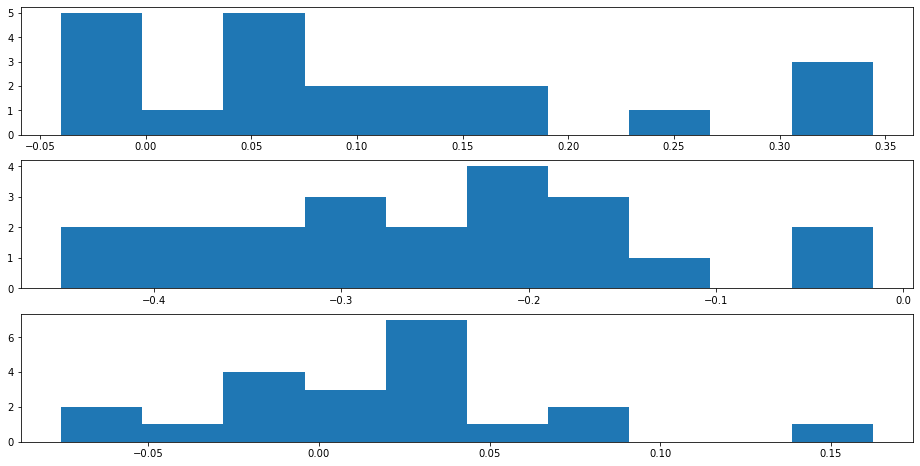

In [37]:
fig, axs = plt.subplots(3, 1)
fig.set_size_inches(16, 8)
axs[0].hist(disparities["black_disparity"] - disparities["black_disparity_stops"])
axs[1].hist(disparities["white_disparity"] - disparities["white_disparity_stops"])
axs[2].hist(disparities["hispanic_disparity"] - disparities["hispanic_disparity_stops"])

(array([1., 0., 0., 2., 1., 1., 1., 4., 6., 5.]),
 array([-0.10772667, -0.09664284, -0.085559  , -0.07447517, -0.06339134,
        -0.05230751, -0.04122368, -0.03013985, -0.01905602, -0.00797219,
         0.00311165]),
 <BarContainer object of 10 artists>)

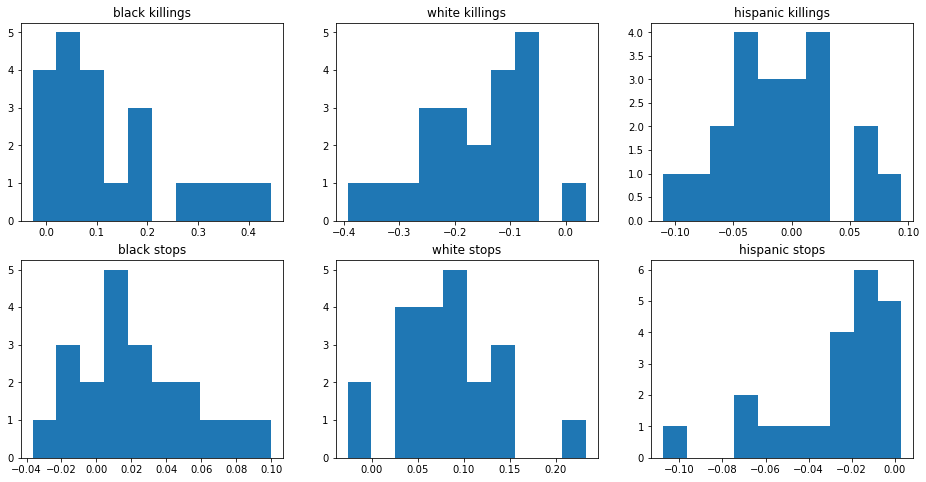

In [38]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(16, 8)
axs[0][0].set_title("black killings")
axs[1][0].set_title("black stops")
axs[0][0].hist(disparities["black_disparity"])
axs[1][0].hist(disparities["black_disparity_stops"])

axs[0][1].set_title("white killings")
axs[1][1].set_title("white stops")
axs[0][1].hist(disparities["white_disparity"])
axs[1][1].hist(disparities["white_disparity_stops"])

axs[0][2].set_title("hispanic killings")
axs[1][2].set_title("hispanic stops")
axs[0][2].hist(disparities["hispanic_disparity"])
axs[1][2].hist(disparities["hispanic_disparity_stops"])

#axs[1].hist(disparities["white_disparity"] - disparities["white_disparity_stops"])
#axs[2].hist(disparities["hispanic_disparity"] - disparities["hispanic_disparity_stops"])